In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import DBSCAN


In [43]:
def get_pca(X):
    """
    Transform data to 2D points for plotting. Should return an array with shape (n, 2).
    """
    flatten_model = make_pipeline(
        # TODO
        MinMaxScaler(),
        PCA(2)
    )
    X2 = flatten_model.fit_transform(X)
    assert X2.shape == (X.shape[0], 2)
    return X2


def get_clusters(X):
    """
    Find clusters of the weather data.
    """
    model = make_pipeline(
        # TODO
        KMeans(n_clusters=9)
#         AgglomerativeClustering(n_clusters=9)
#         AffinityPropagation(random_state=None)
#         DBSCAN(eps=5, min_samples=2)


        
    )
    model.fit(X)
#     return model.fit_predict(X)
    return model.predict(X)


def main():
    data = pd.read_csv(sys.argv[1])

#     X = # TODO
#     y = # TODO
    
    X2 = get_pca(X)
    clusters = get_clusters(X)
    plt.figure(figsize=(10, 6))
    plt.scatter(X2[:, 0], X2[:, 1], c=clusters, cmap='Set1', edgecolor='k', s=30)
    plt.savefig('clusters.png')

    df = pd.DataFrame({
        'cluster': clusters,
        'city': y,
    })
    counts = pd.crosstab(df['city'], df['cluster'])
    print(counts)

cluster          0   1   2   3   4   5   6   7   8
city                                              
Anchorage        0   0   0   0   0   0   0  56   0
Atlanta          0   0   0  46   0   0   1   0   0
Atlantic City    0  40   0   5   0   0   0   0   0
Calgary         48   0   1   0   1   0   0   0   2
Chicago          0  44   0   0   8   0   0   0   0
Denver           0   8   0   1   0   0   0   0   0
Edmonton        25   0   0   0   0   0   0   4  22
Gander          13   0   0   0   0   0   0  36   2
Halifax         46   0   0   0   4   0   0   0   0
London           1   1   0   0  40   0   0   0   0
Los Angeles      0   0   0   0   0  39   0   0   0
Miami            0   0   0   0   0   0  43   0   0
Montreal         2   0   0   0   8   0   0   0  18
New Orleans      0   0   0   0   0   0  45   0   0
Ottawa           1   0   0   0  28   0   0   0  22
Portland         0   2   2   0   0  34   0   0   0
Québec           0   0   0   0   0   0   0   0  35
Raleigh Durham   0   0   0  56 

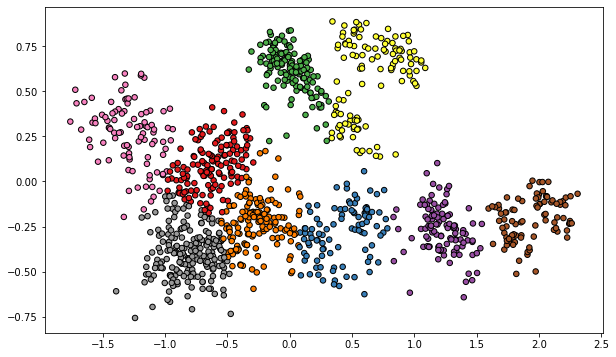

In [45]:
data = pd.read_csv('monthly-data-labelled.csv')
X = data.drop(['city', 'year'], axis=1)
y = data['city'].values

X2 = get_pca(X)
clusters = get_clusters(X2)
plt.figure(figsize=(10, 6))
plt.scatter(X2[:, 0], X2[:, 1], c=clusters, cmap='Set1', edgecolor='k', s=30)
plt.savefig('clusters.png')

df = pd.DataFrame({
    'cluster': clusters,
    'city': y,
})
counts = pd.crosstab(df['city'], df['cluster'])
print(counts)